In [1]:
# GSE217460_210322_TFAtlas_raw.h5ad.gz downloaded from https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE217460
# into dataset folder

In [2]:
# !gzip -d -k Datasets/GSE217460_210322_TFAtlas_raw.h5ad.gz

In [3]:
import scanpy as sc
import numpy as n
import pandas as pd
# Load the h5ad file
adata = sc.read_h5ad('Datasets/GSE217460_210322_TFAtlas_raw.h5ad')
# adata = sc.read_h5ad('Datasets/GSE217460_210322_TFAtlas_differentiated.h5ad')

In [4]:
adata

AnnData object with n_obs × n_vars = 1145823 × 37528
    obs: 'n_genes', 'percent_mito', 'n_counts', 'batch', 'TF'
    var: 'n_cells-0-0', 'n_cells-0-1-0', 'n_cells-1-1-0', 'n_cells-2-1-0', 'n_cells-3-1-0', 'n_cells-0-2-0', 'n_cells-1-2-0', 'n_cells-2-2-0', 'n_cells-3-2-0', 'n_cells-0-3-0', 'n_cells-1-3-0', 'n_cells-2-3-0', 'n_cells-3-3-0', 'n_cells-0-4-0', 'n_cells-1-4-0', 'n_cells-2-4-0', 'n_cells-3-4-0', 'n_cells-0-1', 'n_cells-1-1', 'n_cells-2-1', 'n_cells-3-1'

In [5]:
print(f"Number of cells: {adata.n_obs}")
print(f"Number of genes: {adata.n_vars}")

Number of cells: 1145823
Number of genes: 37528


In [6]:
print(adata.X.shape)

(1145823, 37528)


In [7]:
adata.obs.head(2)

,n_genes,percent_mito,n_counts,batch,TF
"R1.01,R2.01,R3.01,P1.22-0-0",1642,0.030650,2186.0,0,TFORF0867-NR1H2
"R1.01,R2.01,R3.02,P1.22-0-0",1892,0.023033,2605.0,0,TFORF1728-ZNF695


In [8]:
adata.obs.TF.value_counts()

TF
TFORF3550-mCherry    78274
TFORF3549-GFP        49539
TFORF0640-NHP2       13939
TFORF0926-ATOH7       7559
TFORF0274-TCF3        7270
                     ...  
TFORF2443-ABL1           1
TFORF0545-ZFAT           1
TFORF1753-ZNF180         1
TFORF1751-ZNF180         1
TFORF0542-ZFAT           1
Name: count, Length: 3369, dtype: int64

<Axes: xlabel='TF'>

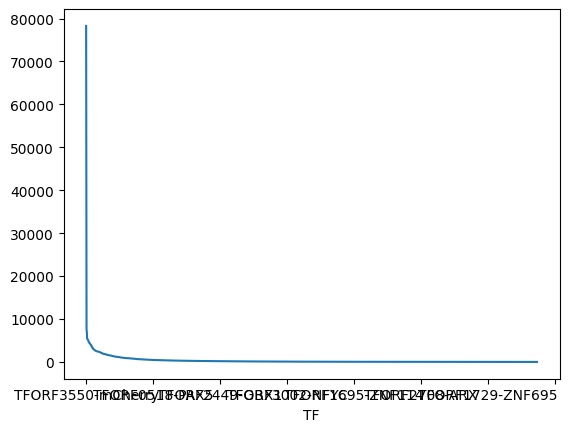

In [9]:
adata.obs.TF.value_counts().plot()

In [10]:
adata.var

,n_cells-0-0,n_cells-0-1-0,n_cells-1-1-0,n_cells-2-1-0,n_cells-3-1-0,n_cells-0-2-0,n_cells-1-2-0,n_cells-2-2-0,n_cells-3-2-0,n_cells-0-3-0,...,n_cells-2-3-0,n_cells-3-3-0,n_cells-0-4-0,n_cells-1-4-0,n_cells-2-4-0,n_cells-3-4-0,n_cells-0-1,n_cells-1-1,n_cells-2-1,n_cells-3-1
A1BG,5233.0,2568.0,1868.0,2140.0,1842.0,2156.0,1869.0,2049.0,1831.0,1741.0,...,2060.0,1450.0,1434.0,222.0,1644.0,999.0,1722.0,1665.0,1906.0,1732.0
A1BG-AS1,438.0,170.0,145.0,170.0,101.0,134.0,169.0,162.0,156.0,161.0,...,139.0,126.0,130.0,21.0,128.0,84.0,84.0,117.0,118.0,100.0
A1CF,1399.0,675.0,527.0,647.0,538.0,600.0,490.0,534.0,566.0,488.0,...,635.0,504.0,442.0,52.0,468.0,346.0,265.0,264.0,287.0,286.0
A2M,2958.0,1219.0,980.0,1210.0,1026.0,1128.0,1031.0,1143.0,1125.0,967.0,...,1172.0,948.0,1010.0,129.0,1008.0,621.0,598.0,664.0,596.0,642.0
A2M-AS1,521.0,261.0,192.0,216.0,169.0,201.0,162.0,197.0,238.0,159.0,...,203.0,130.0,161.0,17.0,161.0,121.0,82.0,86.0,87.0,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,18141.0,8482.0,6373.0,7047.0,6304.0,7392.0,6677.0,7004.0,7115.0,6321.0,...,7269.0,5816.0,5700.0,831.0,6047.0,4039.0,3584.0,3394.0,3867.0,3610.0
ZYG11B,83833.0,35811.0,28096.0,32861.0,29200.0,30646.0,27845.0,29287.0,30981.0,25283.0,...,32084.0,24435.0,25224.0,3379.0,27522.0,19399.0,32504.0,33986.0,38622.0,28450.0
ZYX,21490.0,10018.0,7802.0,8365.0,7008.0,9197.0,8335.0,8299.0,7842.0,8170.0,...,8198.0,7063.0,7363.0,1229.0,7555.0,4995.0,11338.0,10953.0,11103.0,13661.0
ZZEF1,36244.0,15771.0,12025.0,14323.0,11874.0,13990.0,12939.0,13103.0,13560.0,12314.0,...,13971.0,11039.0,11206.0,1844.0,11714.0,7863.0,8233.0,7912.0,8462.0,8474.0


In [11]:
adata.var_names

Index(['A1BG', 'A1BG-AS1', 'A1CF', 'A2M', 'A2M-AS1', 'A2ML1', 'A2MP1',
       'A3GALT2', 'A4GALT', 'A4GNT',
       ...
       'ZWILCH', 'ZWINT', 'ZXDA', 'ZXDB', 'ZXDC', 'ZYG11A', 'ZYG11B', 'ZYX',
       'ZZEF1', 'ZZZ3'],
      dtype='object', length=37528)

In [12]:
adata.X.shape

(1145823, 37528)

# preprocessing

In [13]:
# Filter the database based on the availability of embeddings

In [14]:
embed_df = pd.read_csv("Datasets/morf_less_3069_esm1v_embed.csv")

/var/folders/jl/gnkp_hvs3zqb957750yclnqr0000gn/T/ipykernel_2809/968582702.py:1: DtypeWarning: Columns (9,10,11,12,13,14,15,16,17,18,19,20,21,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  embed_df = pd.read_csv("Datasets/morf_less_3069_esm1v_embed.csv")


In [15]:
embed_df.head(2)

,Unnamed: 0,Source,Name,RefSeq Gene Name,RefSeq and Gencode ID,Isoform ID,Insert,ORF sequence,Barcode Sequence,Epitope Tag,...,emb_dim_1271,emb_dim_1272,emb_dim_1273,emb_dim_1274,emb_dim_1275,emb_dim_1276,emb_dim_1277,emb_dim_1278,emb_dim_1279,emb_dim_1280
0,0,Genewiz,TFORF0001,HIF3A,"NM_022462,ENST00000244303",HIF3A-1,ACCGCCACCATGCGGCCCGCAGCCGGCGCAGCCAGGAGACCGAGGT...,ATGCGGCCCGCAGCCGGCGCAGCCAGGAGACCGAGGTGCTGTACCA...,AGTCAAGACCCTCGGGCTCTGTGG,NaN,...,0.113347,-0.164739,0.023188,-0.181262,-0.124135,-0.081154,-0.265399,-0.185783,0.102427,0.205231
1,1,Genewiz,TFORF0002,HIF3A,"NM_152796,ENST00000472815",HIF3A-2,ACCGCCACCATGCGGCCCGCAGCCGGCGCAGCCAGGAGACCGAGGT...,ATGCGGCCCGCAGCCGGCGCAGCCAGGAGACCGAGGTGCTGTACCA...,CAATTACACCACGTCTGCCTACTA,NaN,...,0.072937,-0.130043,0.041781,-0.166194,-0.114572,-0.146485,-0.291511,-0.186216,0.128230,0.173867


In [16]:
embed_df["TF"] = embed_df["Name"].astype(str) + "-" + embed_df["RefSeq Gene Name"].astype(str)

In [17]:
tf_embed_avail_set = set(embed_df["TF"])

In [18]:
adata = adata[adata.obs.TF.isin(tf_embed_avail_set)]

In [19]:
# filter out the TF with which contain less 100 cells been infected
TF_counts_dic = dict(adata.obs.TF.value_counts())
len(TF_counts_dic)

2539

In [20]:
TF_lower_lim = 10
TF_selected_dic ={}
TF_selected_dic = {k: v for k, v in TF_counts_dic.items() if v >= TF_lower_lim}
len(TF_selected_dic)

2270

In [21]:
adata = adata[adata.obs.TF.isin(TF_selected_dic)]

In [22]:
min(dict(adata.obs.TF.value_counts()).values())

10

In [23]:
adata.shape

(732642, 37528)

In [24]:
# filter out based on mt

/var/folders/jl/gnkp_hvs3zqb957750yclnqr0000gn/T/ipykernel_2809/1081497419.py:1: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['mt'] = adata.var_names.str.startswith('MT-')


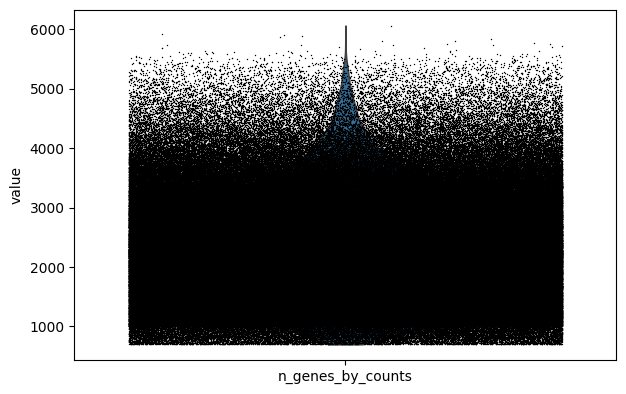

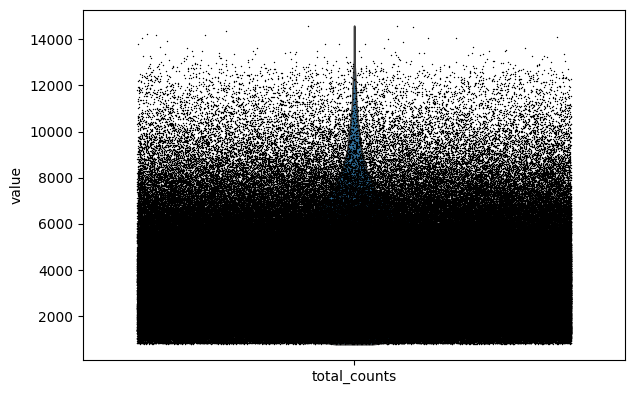

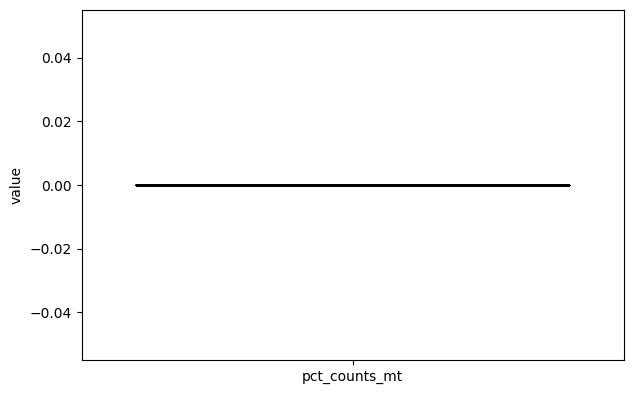

In [25]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

# Scanpy will prepend the string in the save argument with "violin"
# and save it to our figure directory defined in the first step.
sc.pl.violin(adata, ['n_genes_by_counts'], save='_n_genes', jitter=0.4)
sc.pl.violin(adata, ['total_counts'], save='_total_counts', jitter=0.4)
sc.pl.violin(adata, ['pct_counts_mt'], save='_mito_pct', jitter=0.4)

In [26]:
# Filter the data based on counts
adata = adata[adata.obs.n_genes_by_counts < 5000,:]
adata = adata[adata.obs.total_counts < 20000,:]
adata = adata[adata.obs.pct_counts_mt < 15,:]
adata.shape # Checking number of cells remaining


# #instead of picking subjectively, you can use quanitle
# upper_lim = np.quantile(adata_TF_filter.obs.n_genes_by_counts.values, .98)
# lower_lim = np.quantile(adata_TF_filter.obs.n_genes_by_counts.values, .02)
# print(f'{lower_lim} to {upper_lim}')

# #adata = adata[adata.obs.n_genes_by_counts < 7000, :] #example if you wanted to pick a number yourself
# if lower_lim != upper_lim:
#     adata_TF_filter = adata_TF_filter[(adata_TF_filter.obs.n_genes_by_counts < upper_lim) & (adata_TF_filter.obs.n_genes_by_counts > lower_lim)]


# min_genes = 200
# min_cells = 3
# sc.pp.filter_cells(adata, min_genes=min_genes)
# sc.pp.filter_genes(adata, min_cells=min_cells)
# adata

(730397, 37528)

In [27]:
adata.obs.head(2)

,n_genes,percent_mito,n_counts,batch,TF,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt
"R1.01,R2.01,R3.01,P1.22-0-0",1642,0.030650,2186.0,0,TFORF0867-NR1H2,1642,2186.0,0.0,0.0
"R1.01,R2.01,R3.09,P1.46-0-0",2193,0.025601,3164.0,0,TFORF2044-ARID3C,2193,3164.0,0.0,0.0


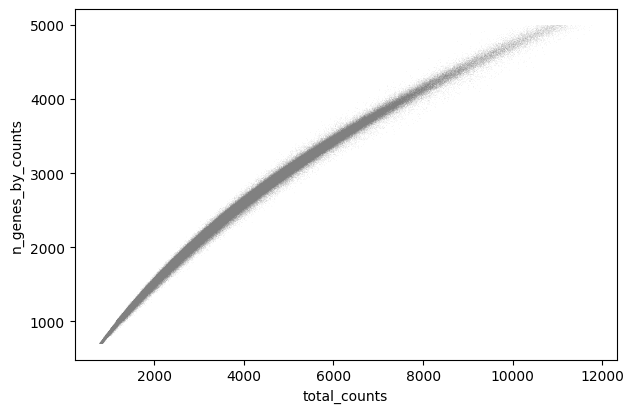

In [28]:
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts', save='_gene_vs_transcript_counts')

In [29]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

/Users/newuser/anaconda3/envs/PerturbNet/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:216: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [ ]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.25)
sc.pl.highly_variable_genes(adata, save='') # scanpy generates the filename automatically

In [ ]:
# # Save raw expression values before variable gene subset
# adata.raw = adata

In [ ]:
adata = adata[:, adata.var.highly_variable]
sc.pp.regress_out(adata, ['total_counts'])
sc.pp.scale(adata, max_value=10)

In [ ]:
# Principal component analysis

In [ ]:
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata, log=True, n_pcs=50, save='') # scanpy generates the filename automatically

In [ ]:
# UMAP and Leiden Clustering

In [ ]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=30)
sc.tl.umap(adata)
sc.tl.leiden(adata, resolution=0.5)
sc.pl.umap(adata, color=['leiden'], legend_fontsize=8, save='_leiden')

In [ ]:
# Finding cluster markers

In [ ]:
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')

# The head function returns the top n genes per cluster
top_markers = pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(5)
print(top_markers)

In [ ]:
# Save/load the results

In [ ]:
# adata.write(data_path + 'adata_after_diffexp.h5ad')
# adata = sc.read(data_path + 'adata_after_diffexp.h5ad')

In [ ]:
# Merging clusters and labeling cell types